In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  


In [10]:
data_train = pd.read_csv("train.csv")

In [31]:
pd.set_option('display.max_columns', None)
data_train

,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,ocr,strata,3,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,uncategorized,guarded,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,ocr,strata,3,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,1999.0,24.0,1259.0,uncategorized,guarded,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,ocr,strata,4,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,1959.0,uncategorized,guarded,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,ocr,strata,3,2.0,14,east region,bedok,kaki bukit,1.329367,103.905791,freehold,NaN,237.0,883.0,uncategorized,guarded,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,ocr,strata,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,uncategorized,guarded,2021-12-24,2262700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,2322717,citylights,jellicoe road,condominium,condominium,ocr,strata,3,3.0,8,central region,kallang,lavender,1.308896,103.863069,leasehold/99 years,2007.0,600.0,1442.0,uncategorized,guarded,2021-12-14,2750000.0
26044,3161844,dalvey haus,101 dalvey road,condominium,condominium,ocr,strata,3,3.0,10,central region,tanglin,nassim,1.316263,103.825190,freehold,NaN,17.0,1561.0,uncategorized,guarded,2022-01-05,6449300.0
26045,2402528,my manhattan,25 simei street 3,condominium,condominium,ocr,strata,2,2.0,18,east region,tampines,simei,1.341303,103.953348,leasehold/99 years,2014.0,301.0,883.0,uncategorized,guarded,2021-06-23,1306800.0
26046,8150354,j gateway,gateway drive,condominium,condominium,ocr,strata,4,3.0,22,west region,jurong east,jurong gateway,1.335557,103.742417,leasehold/99 years,2016.0,738.0,1206.0,uncategorized,guarded,2021-10-23,2420000.0


In [12]:
data_train['price'].describe()

count    2.604800e+04
mean     2.994669e+06
std      4.324294e+06
min      5.566000e+05
25%      1.331000e+06
50%      1.851800e+06
75%      2.948000e+06
max      7.480000e+07
Name: price, dtype: float64

In [19]:
a=data_train['price']/1000000

<AxesSubplot:xlabel='price', ylabel='Density'>

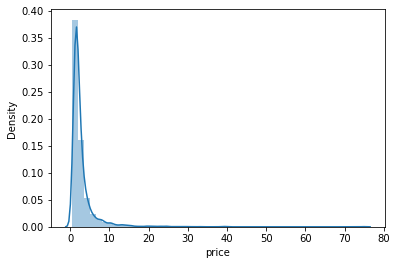

In [20]:
sns.distplot(a)

In [21]:
a.describe()

count    26048.000000
mean         2.994669
std          4.324294
min          0.556600
25%          1.331000
50%          1.851800
75%          2.948000
max         74.800000
Name: price, dtype: float64

In [22]:
#skewness and kurtosis
print("Skewness: %f" % a.skew())
print("Kurtosis: %f" % a.kurt())

Skewness: 7.801323
Kurtosis: 89.644928


In [8]:
print("Skewness: %f" % data_train['price'].skew())
print("Kurtosis: %f" % data_train['price'].kurt())

Skewness: 7.793932
Kurtosis: 89.321184


In [23]:
data_train.columns

Index(['listing_id', 'name', 'street', 'type', 'model', 'market_segment',
       'type_of_area', 'bedrooms', 'bathrooms', 'district', 'region',
       'planning_area', 'subszone', 'lat', 'lng', 'tenure', 'built_year',
       'no_of_units', 'area_size', 'eco_category', 'accessibility',
       'date_listed', 'price'],
      dtype='object')

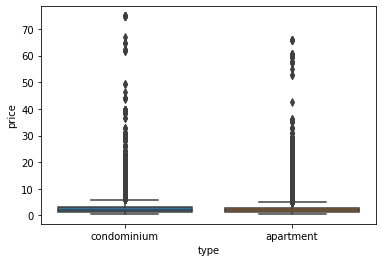

In [30]:
var = 'type'
data = pd.concat([a, data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="price", data=data)

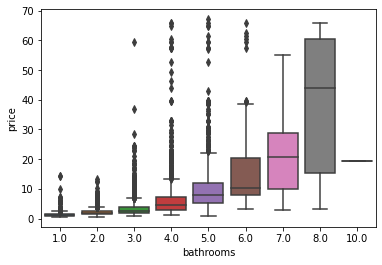

In [24]:
var = 'bathrooms'
data = pd.concat([a, data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="price", data=data)

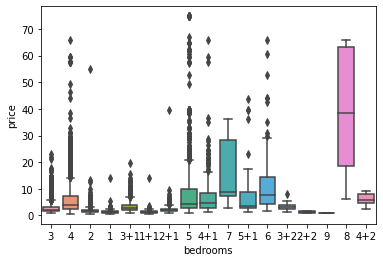

In [25]:
var = 'bedrooms'
data = pd.concat([a, data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="price", data=data)

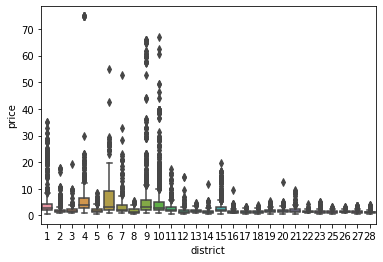

In [32]:
var = 'district'
data = pd.concat([a, data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="price", data=data)

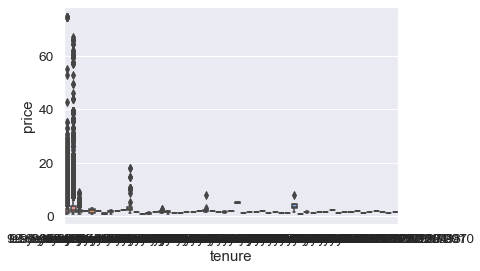

In [47]:
var = 'tenure'
data = pd.concat([a, data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="price", data=data)

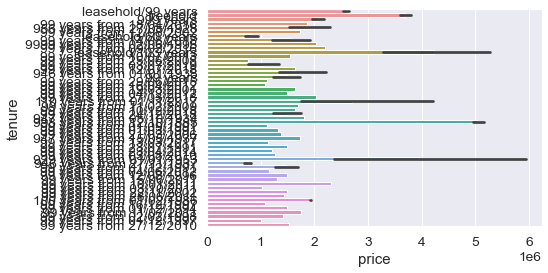

In [50]:

p1=sns.barplot( data=data_train, y='tenure', x='price' )
plt.show()


In [28]:
data_train['built_year'].describe()

count    16005.000000
mean      2010.926398
std         11.915875
min       1799.000000
25%       2010.000000
50%       2014.000000
75%       2016.000000
max       2021.000000
Name: built_year, dtype: float64

<AxesSubplot:xlabel='built_year', ylabel='price'>

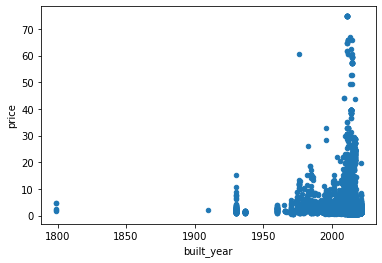

In [29]:
var = 'built_year'
data = pd.concat([a, data_train[var]], axis=1)
data.plot.scatter(x=var, y='price')

<AxesSubplot:xlabel='no_of_units', ylabel='price'>

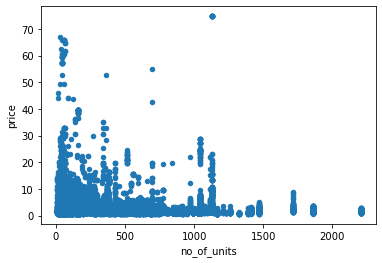

In [34]:
var = 'no_of_units'
data = pd.concat([a, data_train[var]], axis=1)
data.plot.scatter(x=var, y='price')

<AxesSubplot:xlabel='area_size', ylabel='price'>

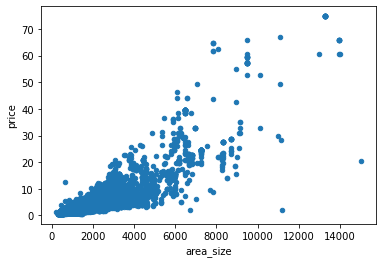

In [27]:
var  = 'area_size'
data = pd.concat([a, data_train[var]], axis=1)
data.plot.scatter(x=var, y='price')

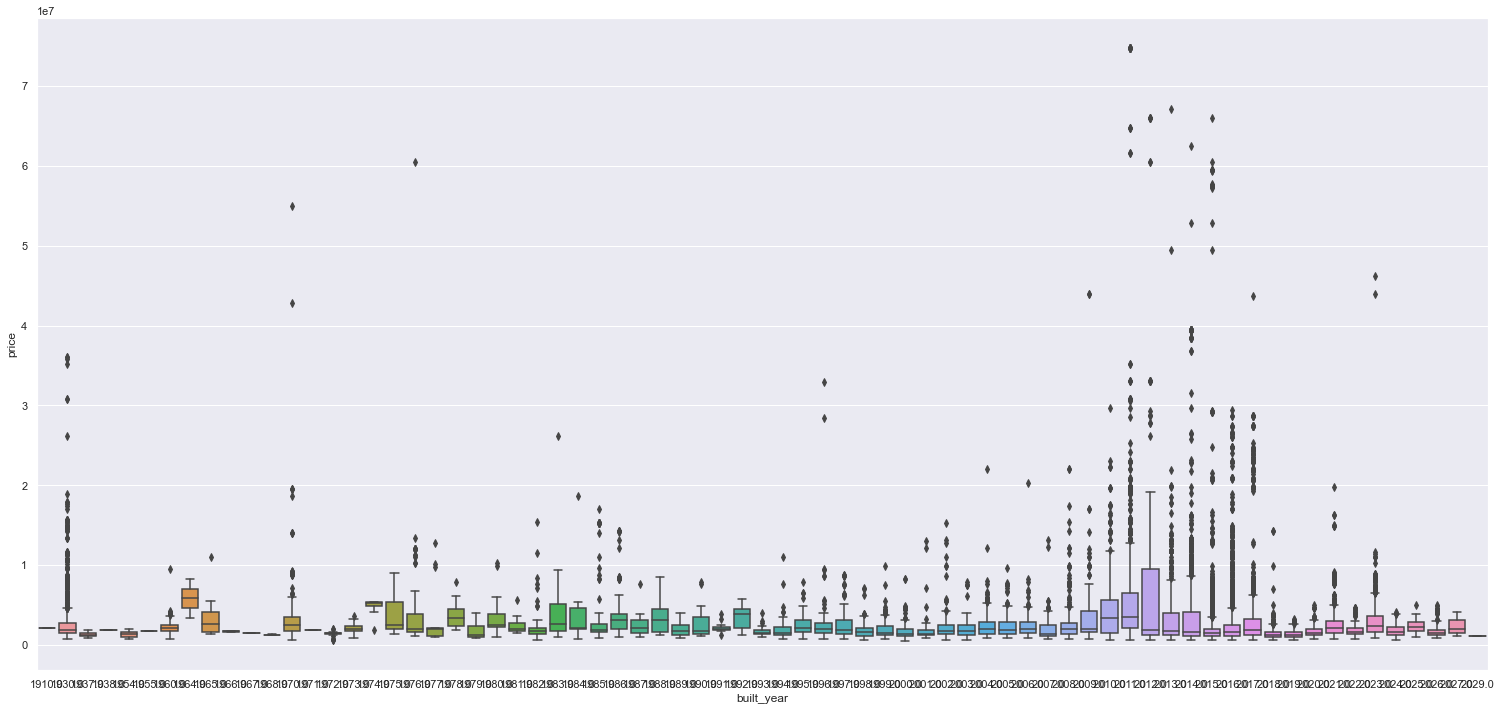

In [25]:
var = 'built_year'
data = pd.concat([data_train['price'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="price", data=data)


In [51]:
data_train = pd.read_csv("corr_plot.csv")

In [53]:
data_train.head()

,Unnamed: 0,listing_id,name,street,type,bathrooms,district,region,planning_area,subszone,built_year,no_of_units,area_size,date_listed,price,bedrooms,tenure_remains,tenure_years,comme_min_distance,comme_no_1km,comme_no_3km,gov-m_min_distance,gov-m_no_1km,gov-m_no_3km,shopp_min_distance,shopp_no_1km,shopp_no_3km,secon_min_distance,secon_no_1km,secon_no_3km,prima_min_distance,prima_no_1km,prima_no_3km,train_min_distance,train_no_1km,train_no_3km
0,0,6998418,seascape,57 cove way,condominium,4.0,4,central region,southern islands,sentosa,2011.0,151.0,2336.0,2021-05-04,5390000.0,3.0,99,99,3.465477,0,0,2.523949,0,7,1.992149,0,6,2.739930,0,1,2.511796,0,3,2.110841,0,7
1,1,2046604,la maison,10 moulmein rise,apartment,3.0,11,central region,novena,moulmein,1999.0,24.0,1259.0,2021-05-07,2310000.0,3.0,1000000,999,0.253532,2,6,0.322039,5,44,0.210706,11,70,0.786247,3,27,0.145587,7,35,0.230193,5,53
2,2,7563513,viva,2 suffolk walk,condominium,3.0,11,central region,novena,moulmein,2012.0,235.0,1959.0,2021-06-30,5279500.0,4.0,1000000,999,0.308259,1,5,0.402367,5,45,0.124587,11,70,0.668196,1,28,0.182761,7,34,0.331496,5,50
3,3,3071445,urban treasures,205 jalan eunos,condominium,2.0,14,east region,bedok,kaki bukit,1930.0,237.0,883.0,2022-01-02,1843600.0,3.0,1000000,999,1.146688,0,3,0.632724,2,29,1.044382,0,25,0.308054,1,30,0.300643,4,33,0.426680,5,24
4,4,9667539,infini at east coast,east coast road,apartment,3.0,15,east region,bedok,frankel,2022.0,36.0,1066.0,2021-12-24,2262700.0,3.0,1000000,999,1.380337,0,1,0.384105,4,25,0.510369,7,18,0.388370,3,20,0.232984,6,22,0.822432,2,18


In [54]:
data_train.drop(columns=['Unnamed: 0', 'listing_id', 'name','street', 'type',
                       'region', 'planning_area', 'subszone', 'date_listed', 
                      'tenure_remains', 'comme_min_distance', 'comme_no_1km',
       'comme_no_3km', 'gov-m_min_distance', 'gov-m_no_1km', 'gov-m_no_3km',
       'shopp_min_distance', 'shopp_no_1km', 'shopp_no_3km',
       'secon_min_distance', 'secon_no_1km', 'secon_no_3km',
       'prima_min_distance', 'prima_no_1km', 'prima_no_3km',
       'train_min_distance', 'train_no_1km', 'train_no_3km'  ],inplace=True)

In [58]:
data_train.columns

Index(['bathrooms', 'district', 'built_year', 'no_of_units', 'area_size',
       'price', 'bedrooms', 'tenure_years'],
      dtype='object')

<AxesSubplot:>

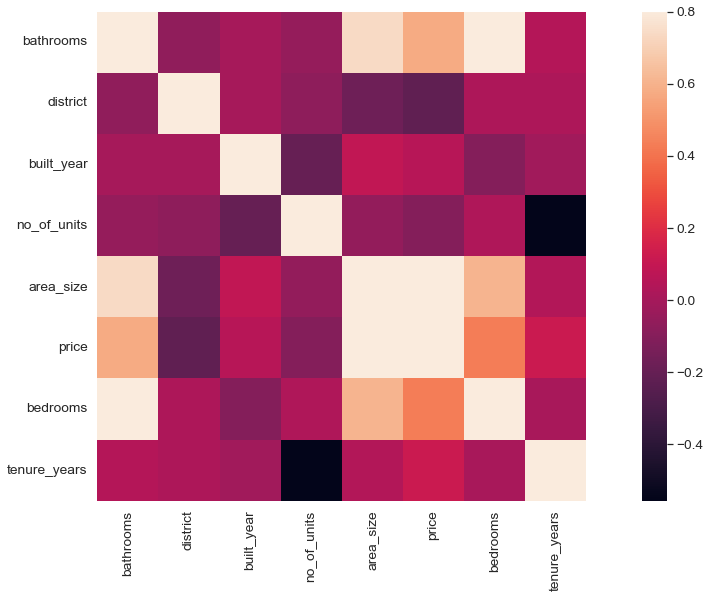

In [55]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

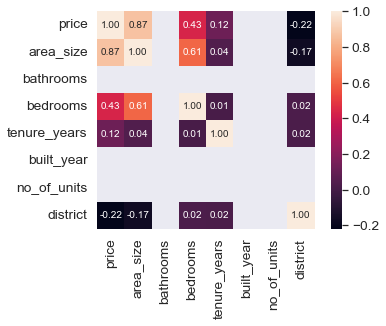

In [61]:
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [57]:
data_train.columns

Index(['bathrooms', 'district', 'built_year', 'no_of_units', 'area_size',
       'price', 'bedrooms', 'tenure_years'],
      dtype='object')

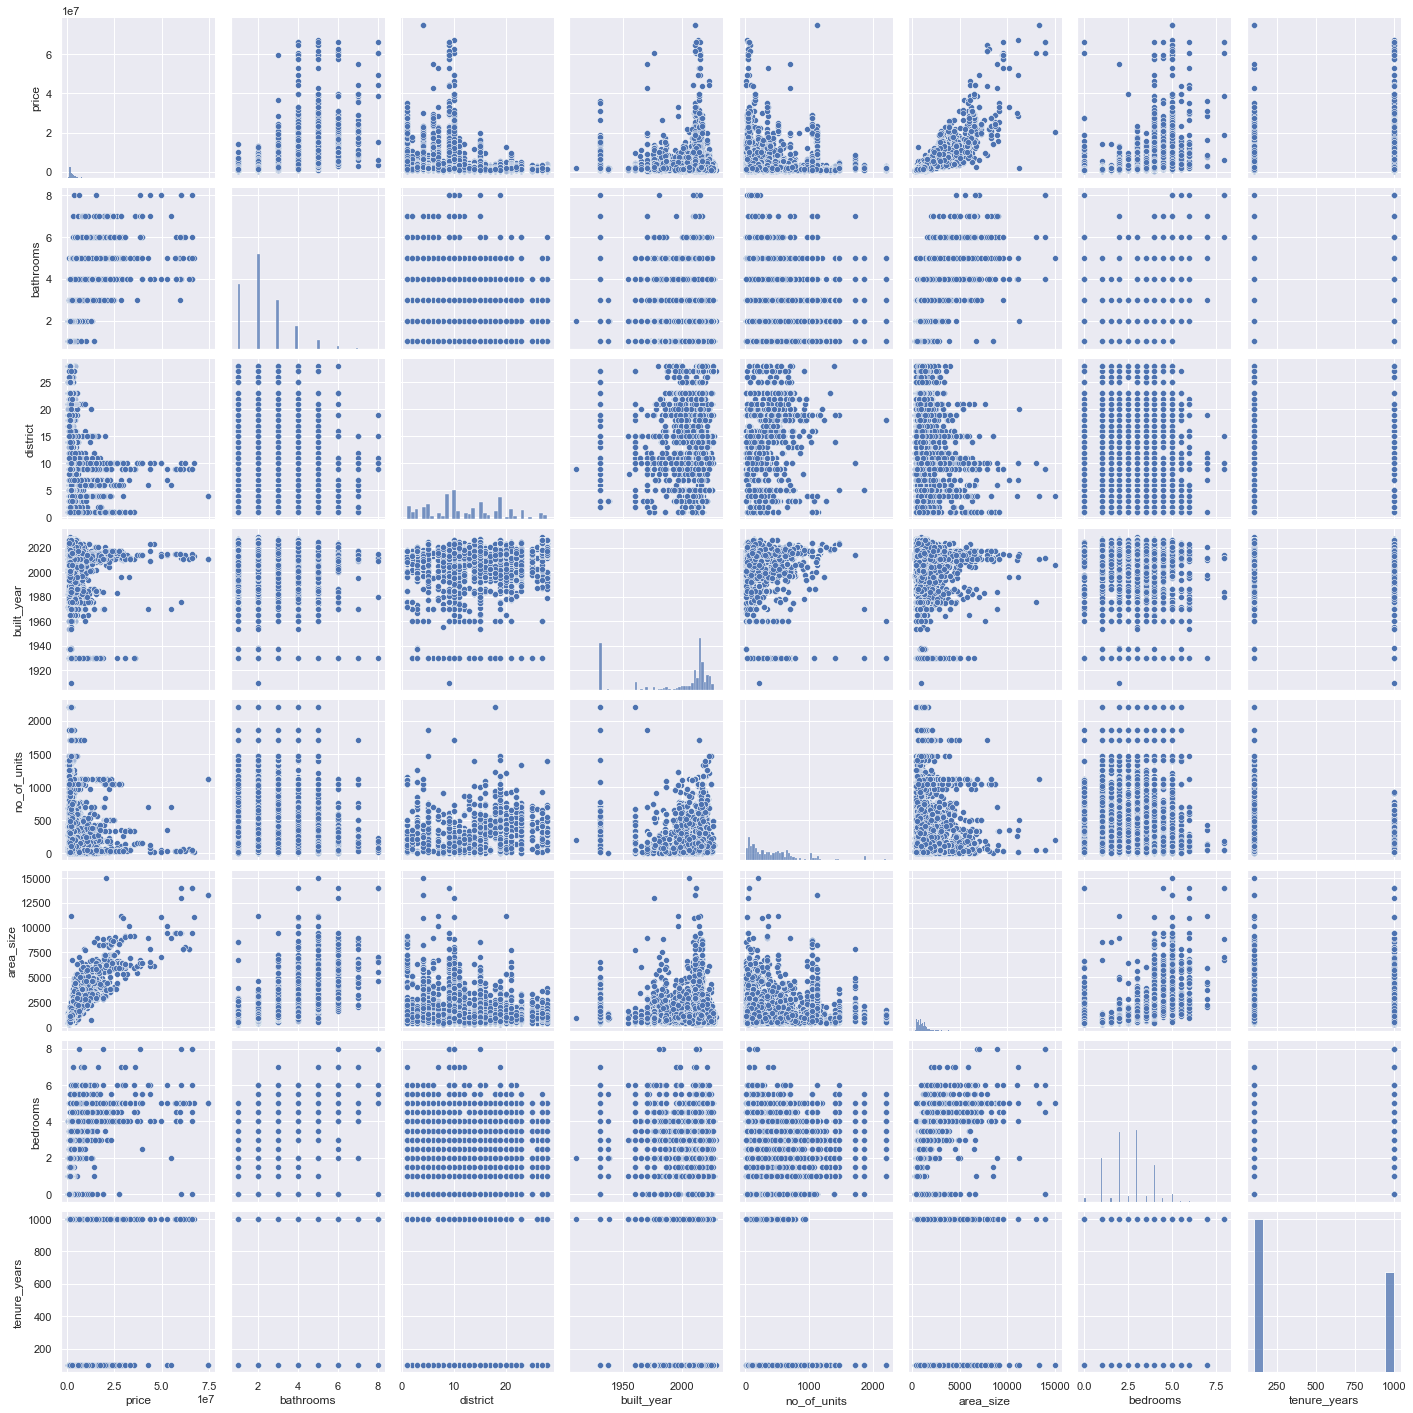

In [59]:
sns.set()
cols = ['price','bathrooms', 'district', 'built_year', 'no_of_units', 'area_size',
        'bedrooms', 'tenure_years']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()